# LIBRERIAS

In [2]:
# Librerias EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# Librerias ML

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV


# PASO 1: Planteamiento del problema y Recopilación de Datos.

##### PLANTEAMIENTO DEL PROBLEMA:

- Queremos predecir si un paciente tiene diabetes a partir de medidas diagnósticas


##### RECOPILACION DE DATOS:
-------------------------------------------------------

In [3]:
#Recopilamos datos
data_url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
sep = (",")

def DataCompiler(url, sep):
    data = pd.read_csv(url, sep = sep)

    #Guardamos el csv en local
    data.to_csv("../data/raw/raw_data.csv", sep=";")

    return data

data = DataCompiler(data_url, sep)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# PASO 2: Exploración y Limpieza de Datos.

- #### Obtener dimensiones del dataset
-------------------------------------------------------

In [4]:
#Obtenemos informacion sobre el dataset

def DataInfo(dataset):
    print(f"Dataset dimensions: {dataset.shape}")
    print(f"\nDataset information:\n{dataset.info()}")
    print(f"\nDataset nan-values: {dataset.isna().sum().sort_values(ascending=False)}")
    

DataInfo (data)

Dataset dimensions: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Dataset information:
None

Dataset nan-values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI          

##### CONCLUSIONES:
-------------------------------------------------------

- Dimensiones: 3140, 108
- Valores nulos: Sin valores nulos.
- Tipo de datos:
    - Pregnacy: Discreta.
    - Glucose: Continua.
    - BloodPressure: Continua.
    - SkinThickness: Continua.
    - Insulin: Continua.
    - BMI: Continua
    - DiabetesPedigreeFunction: Continua
    - Age: Continua.
    - Outcome: Discreta (Target)

- #### Eliminacion de Duplicados
---------------------------------------------

In [5]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.

def EraseDuplicates(dataset, current_id = ""):
    older_shape = dataset.shape
    id = current_id
    
    if (id != ""):
        dataset.drop(id , axis = 1, inplace = True)
                     
    if (dataset.duplicated().sum()):
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
        print ("Erase duplicates...")
        dataset.drop_duplicates(inplace = True)
    else:
        print ("No coincidences.")
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

data = EraseDuplicates(data)

No coincidences.
The older dimension of dataset is (768, 9), and the new dimension is (768, 9).


- #### Eliminacion de datos irrelevantes.
-----------------------------------------------------------------------------------

- Este Dataset es muy pequeño como para quitarle datos a priori.

In [6]:
#Funcion para eliminar datos irrelevantes a traves de una lista dada.

irrelevant_lst = []

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

# PASO 3: Analisis de variables univariantes

- #### Analisis sobre variables categóricas
--------------------------------------------------------------

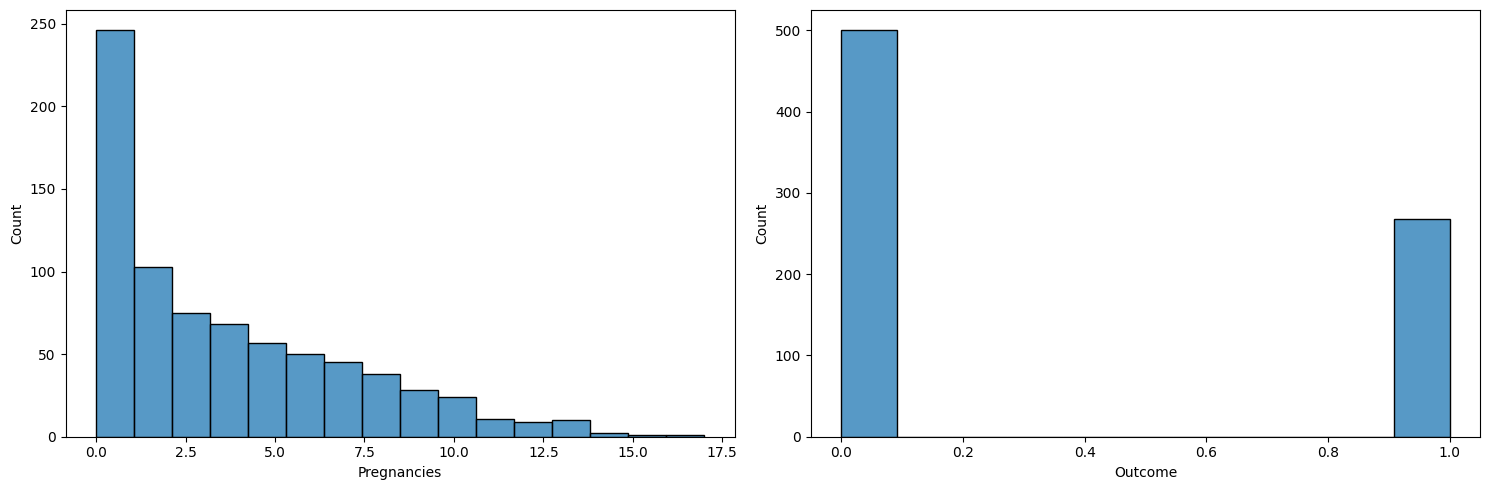

In [7]:
#Analisis sobre variables categoricas

categoric_predictors = ["Pregnancies", "Outcome"]

def CategoricGraf(dataset, lst):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(15,5))

    #Creamos las graficas necesarias
    for i in range(len(lst)):
        sns.histplot( ax = axis[i], data = dataset, x = lst[i])
   

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data, categoric_predictors)

#### CONCLUSIONES:
------------------------------------------------------

- La mayor parte de la muestra no ha estado embarazado.

- #### Analisis sobre variables continuas
-----------------------------------------------------------------------

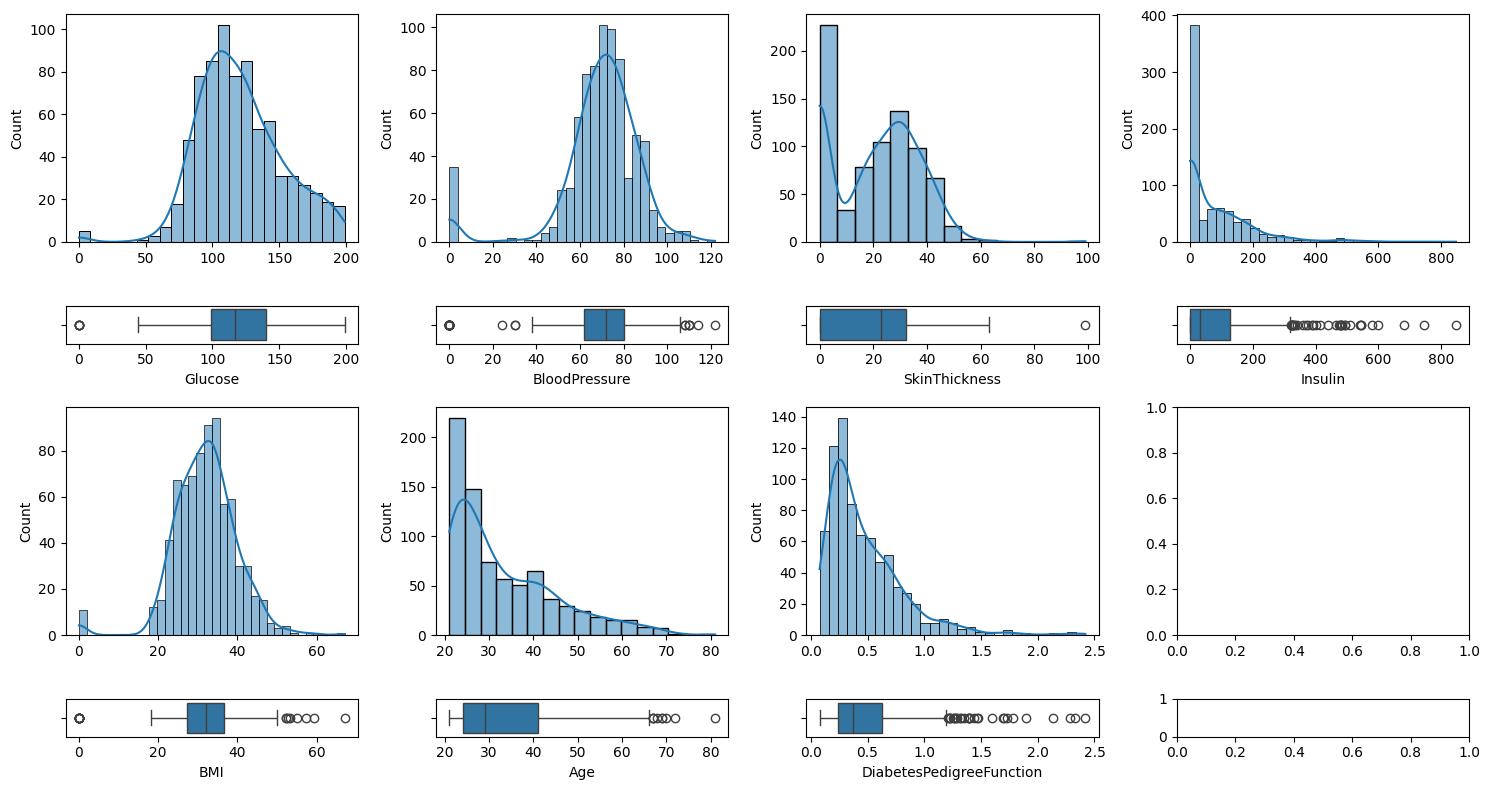

In [8]:
# Analisis sobre variables numericas

continuous_lst = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]
vector_ax = [4,4]

def NumericalGraf(dataset, lst, ax_dimension):

    x_pos = 0
    y_pos = 0
    #Creamos la figura
    fig, axis = plt.subplots(ax_dimension[0], ax_dimension[1], figsize=(15,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    for i in range(len(lst)):
       sns.histplot( ax = axis[x_pos,y_pos], data = dataset, x = lst[i], kde = True).set(xlabel = None)
       sns.boxplot( ax = axis[x_pos + 1,y_pos], data = dataset, x = lst[i])
       y_pos += 1
       if (y_pos == ax_dimension[1]):
           x_pos += 2
           y_pos = 0
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data, continuous_lst, vector_ax)

##### CONCLUSIONES
-----------------------------------------------

- Glucose:
    - Distribución normal.
    - Media 120
    - Low Outlier en 40
- BloodPresure:
    - Distribución normal.
    - Media 75
    - Low Outlier en 38
- SkinThinckness:
    - Distribución asimétrica positiva.
    - Media 23
- Insulin:
    - Distribución asimétrica positiva.
    - Media 30
- BMI:
    - Distribución normal.
    - Media 32
    - Low Outlier 19
- Age:
    - Distribución asimétrica positiva.
    - Media 28
    - Low Outlier 21
- DiabetesPedigreeFunction:
    - Distribución asimétrica positiva.
    - Media 0.4


# PASO 4: Analisis de variable multivariante

- Analisis Outcome (Pregnacy) Categorico-Categorico
----------------------------------------------------------------------

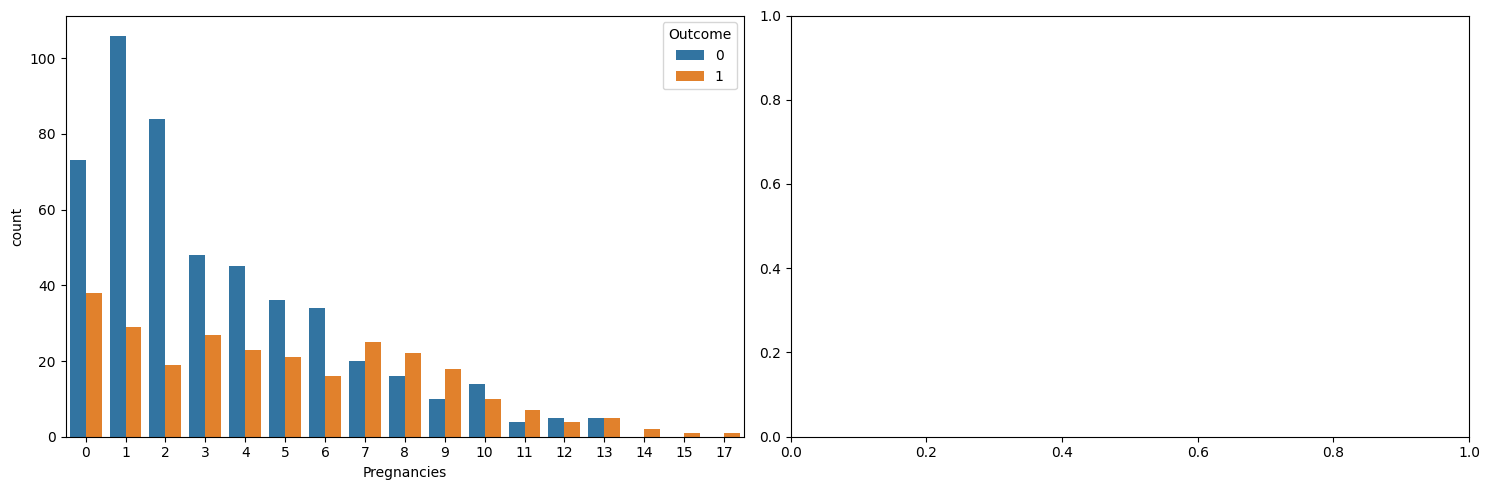

In [9]:
#Analisis Categorico/categorico
target = "Outcome"
categoric_predictors = ["Pregnancies"]

def CatCatAnalysi(dataset, target, lst):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(15,5))

    #Creamos las graficas.
    for i in range(len(lst)):
        sns.countplot(ax = axis[i], data = dataset, x = lst[i], hue = target)


    plt.tight_layout()
    plt.show()

CatCatAnalysi(data, target, categoric_predictors)

##### CONCLUSIONES:
------------------------------------

-Vemos que cuantos más embarazos ha tenido el paciente más posible es que tenga diabetes.

- Analisis Continuo/Continuo
---------------------------------------------------

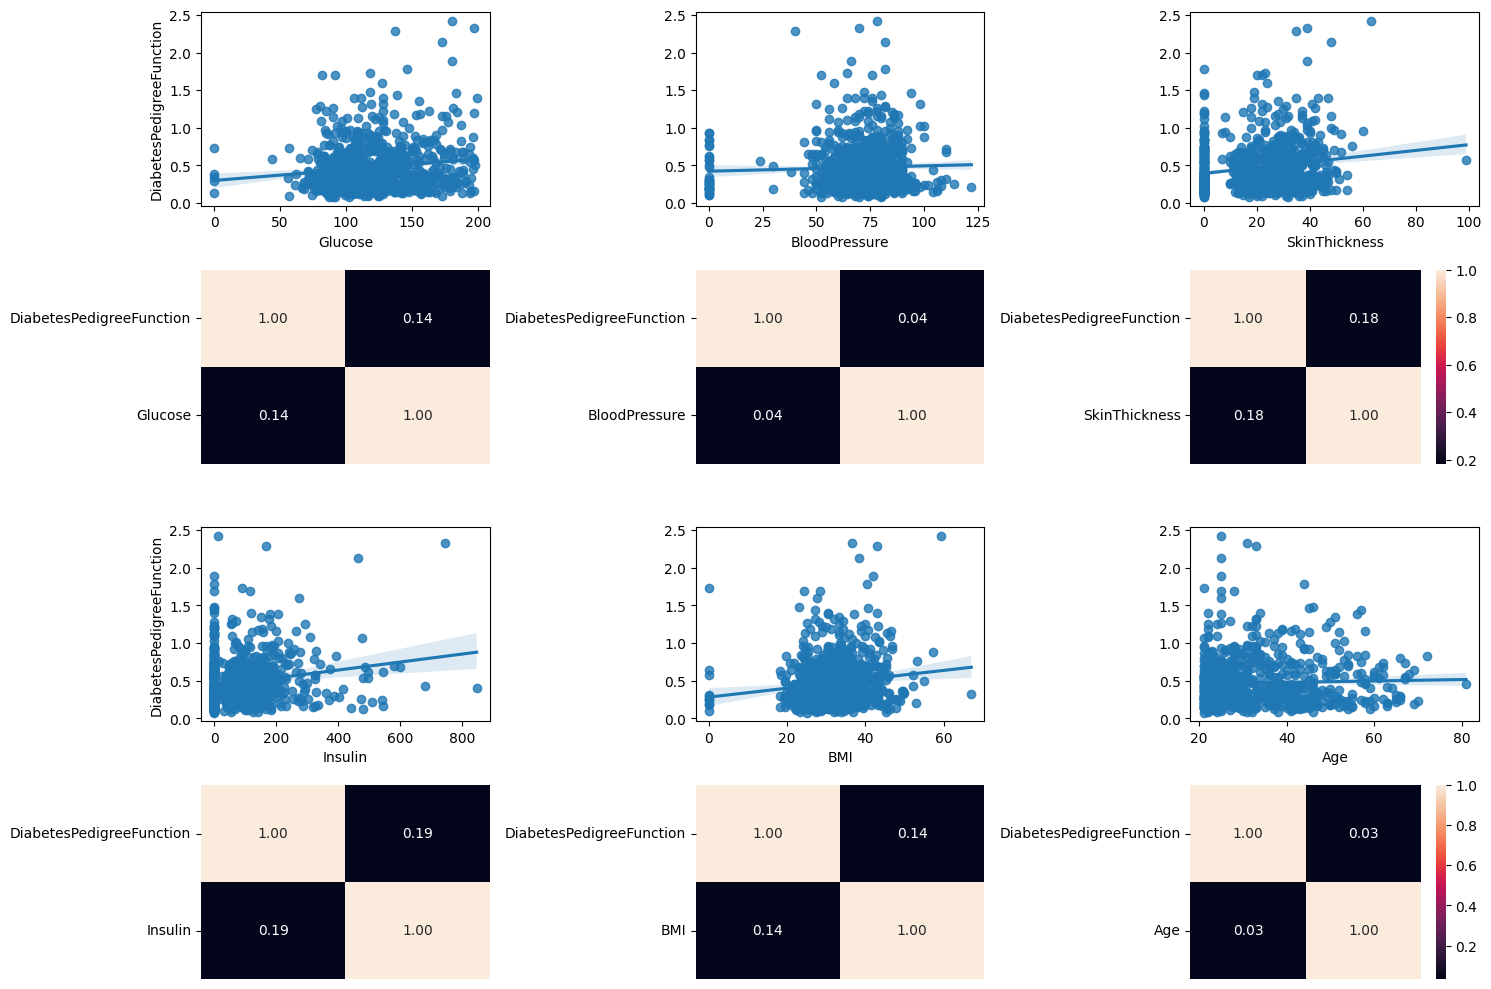

In [10]:
continuous_y = "DiabetesPedigreeFunction"
continuous_lst = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
vector_ax = [4,3]

def NumNumAnalysi(dataset, y, x_list, ax_dimension):
    #Creamos la figura
    fig, axis = plt.subplots(ax_dimension[0], ax_dimension[1], figsize=(15,10))

    x_pos = 0
    y_pos = 0

    for i in range(len(x_list)):
        if (y_pos == 0):
            sns.regplot( ax = axis[x_pos, y_pos], data = dataset, x = x_list[i], y = y)
        else:
            sns.regplot( ax = axis[x_pos, y_pos], data = dataset, x = x_list[i], y = y).set(ylabel = None)

        if (y_pos < ax_dimension[1] - 1):
            sns.heatmap( data[[y,x_list[i]]].corr(), annot=True, fmt=".2f", ax = axis[x_pos + 1, y_pos], cbar=False, xticklabels = False)
        else:
            sns.heatmap( data[[y,x_list[i]]].corr(), annot = True, fmt = ".2f", ax = axis[x_pos + 1, y_pos], xticklabels = False) 
        
        y_pos = y_pos + 1
        if (y_pos == ax_dimension[1]):
            y_pos = 0
            x_pos = x_pos + 2
    
    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, continuous_y, continuous_lst, vector_ax)

##### CONCLUSIONES:
-----------------------------------

- Hemos enfrentado la predictora DPF contra las demás predictoras variables para saber si hay algun factor determinante además del genético.
    - La mayor correlación ha sido de DPF con Insulina del 0.19.

##### Combinación Target / Predictors
------------------------------------------------

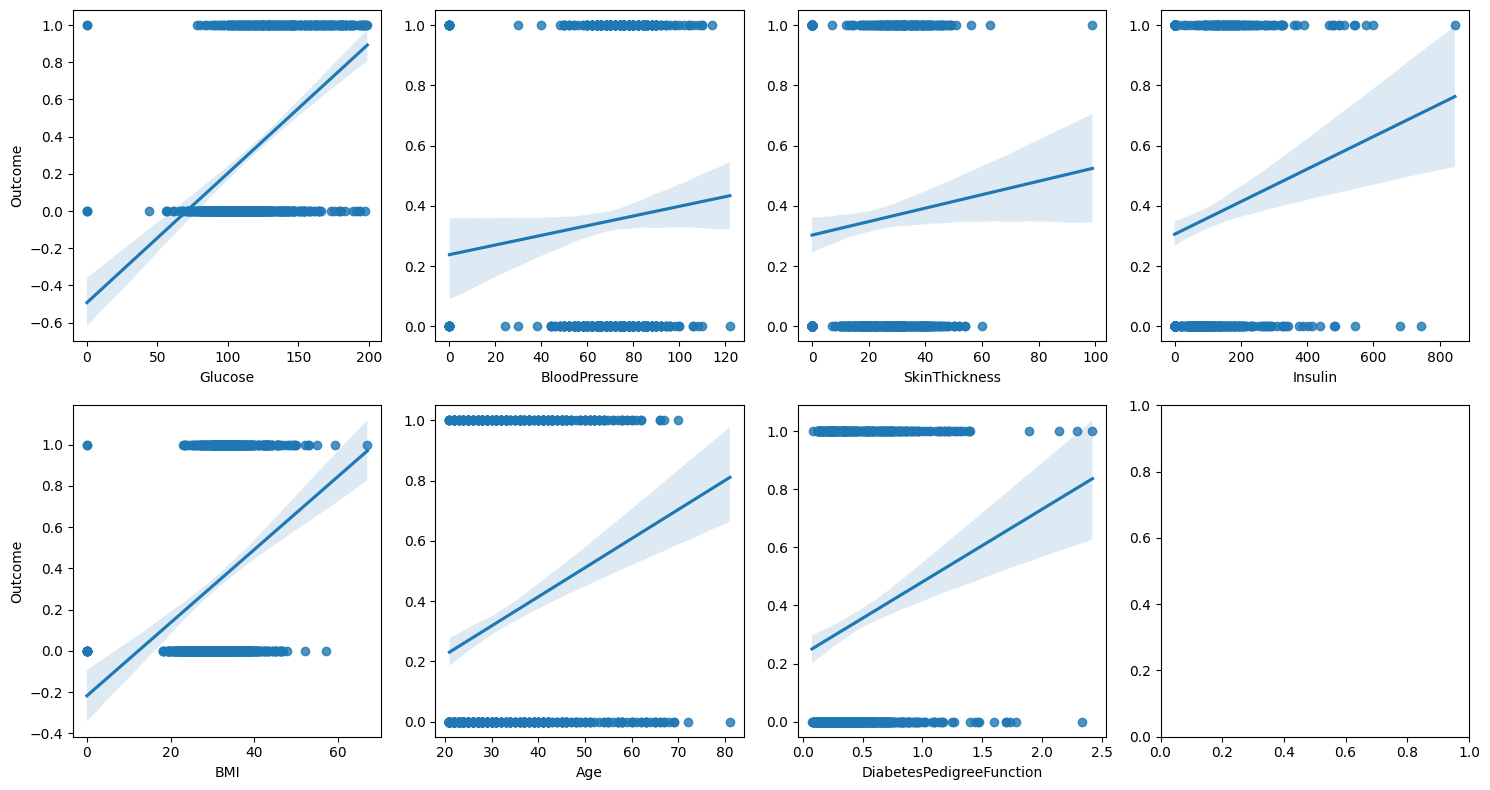

In [11]:

vector_ax = [2,4]
continuous_lst = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]

def CombTargPred(dataset, target_class, lst, ax_dimension):
    
    y_pos = 0
    x_pos = 0

    fig, axis = plt.subplots(ax_dimension[0], ax_dimension[1], figsize = (15, 8))

    for i in range(len(lst)):
        
        if (y_pos == 0):
            sns.regplot(ax = axis[x_pos,y_pos], data = dataset, x = lst[i], y = target_class)
        elif (y_pos != 0):
            sns.regplot(ax = axis[x_pos, y_pos], data = dataset, x = lst[i], y = target_class).set(ylabel=None)

        y_pos += 1

        if (y_pos == ax_dimension[1]):
            x_pos += 1
            y_pos = 0

    

    plt.tight_layout()
    plt.show()

CombTargPred(data, target, continuous_lst, vector_ax)

#### CONCLUSIONES:
------------------------------------

- Vemos como cuanto más alto es el valor enfrentado a la target más posibilidades hay de que el paciente si sea diabetico.

### Creamos la tabla de correlaciones
-------------------------------------------------

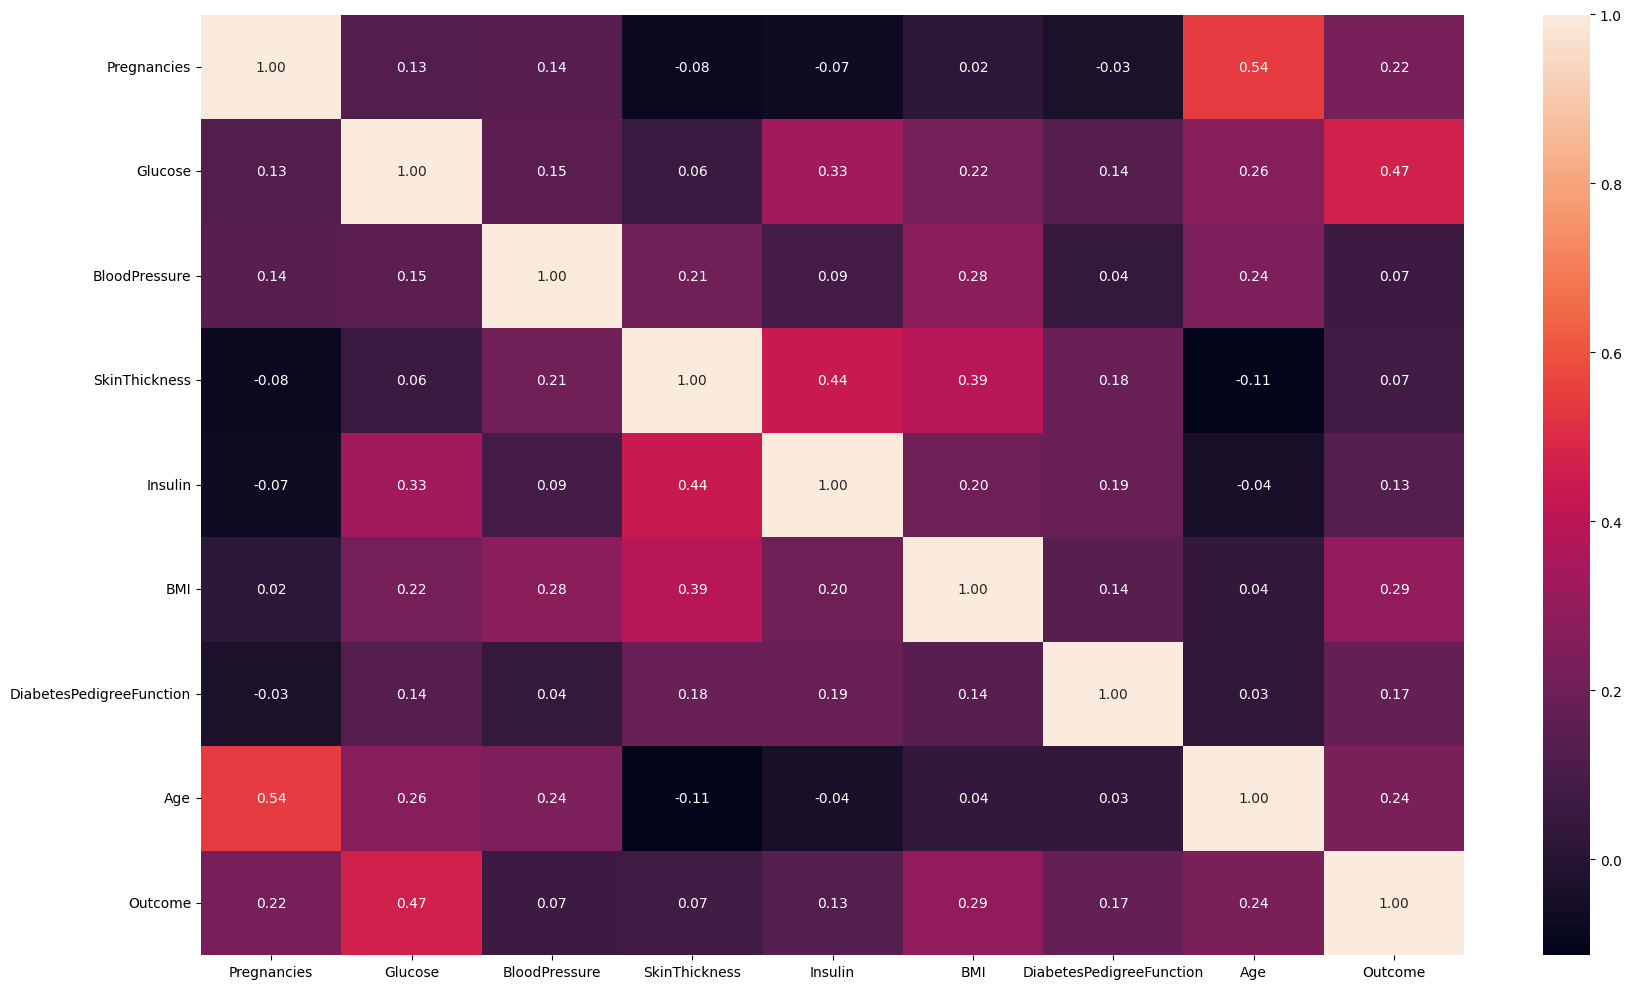

In [12]:
#Tabla de correlaciones

def CorrelationPlot(dataset):
    fig, axis = plt.subplots(figsize=(18,10))

    sns.heatmap(dataset.corr(), annot=True, fmt=".2f")

    plt.tight_layout()
    plt.show()

CorrelationPlot(data)

##### Conclusiones
------------------------------------

- Comprobamos que los niveles de glucosa en sangre es la predictora más relacionada con la target

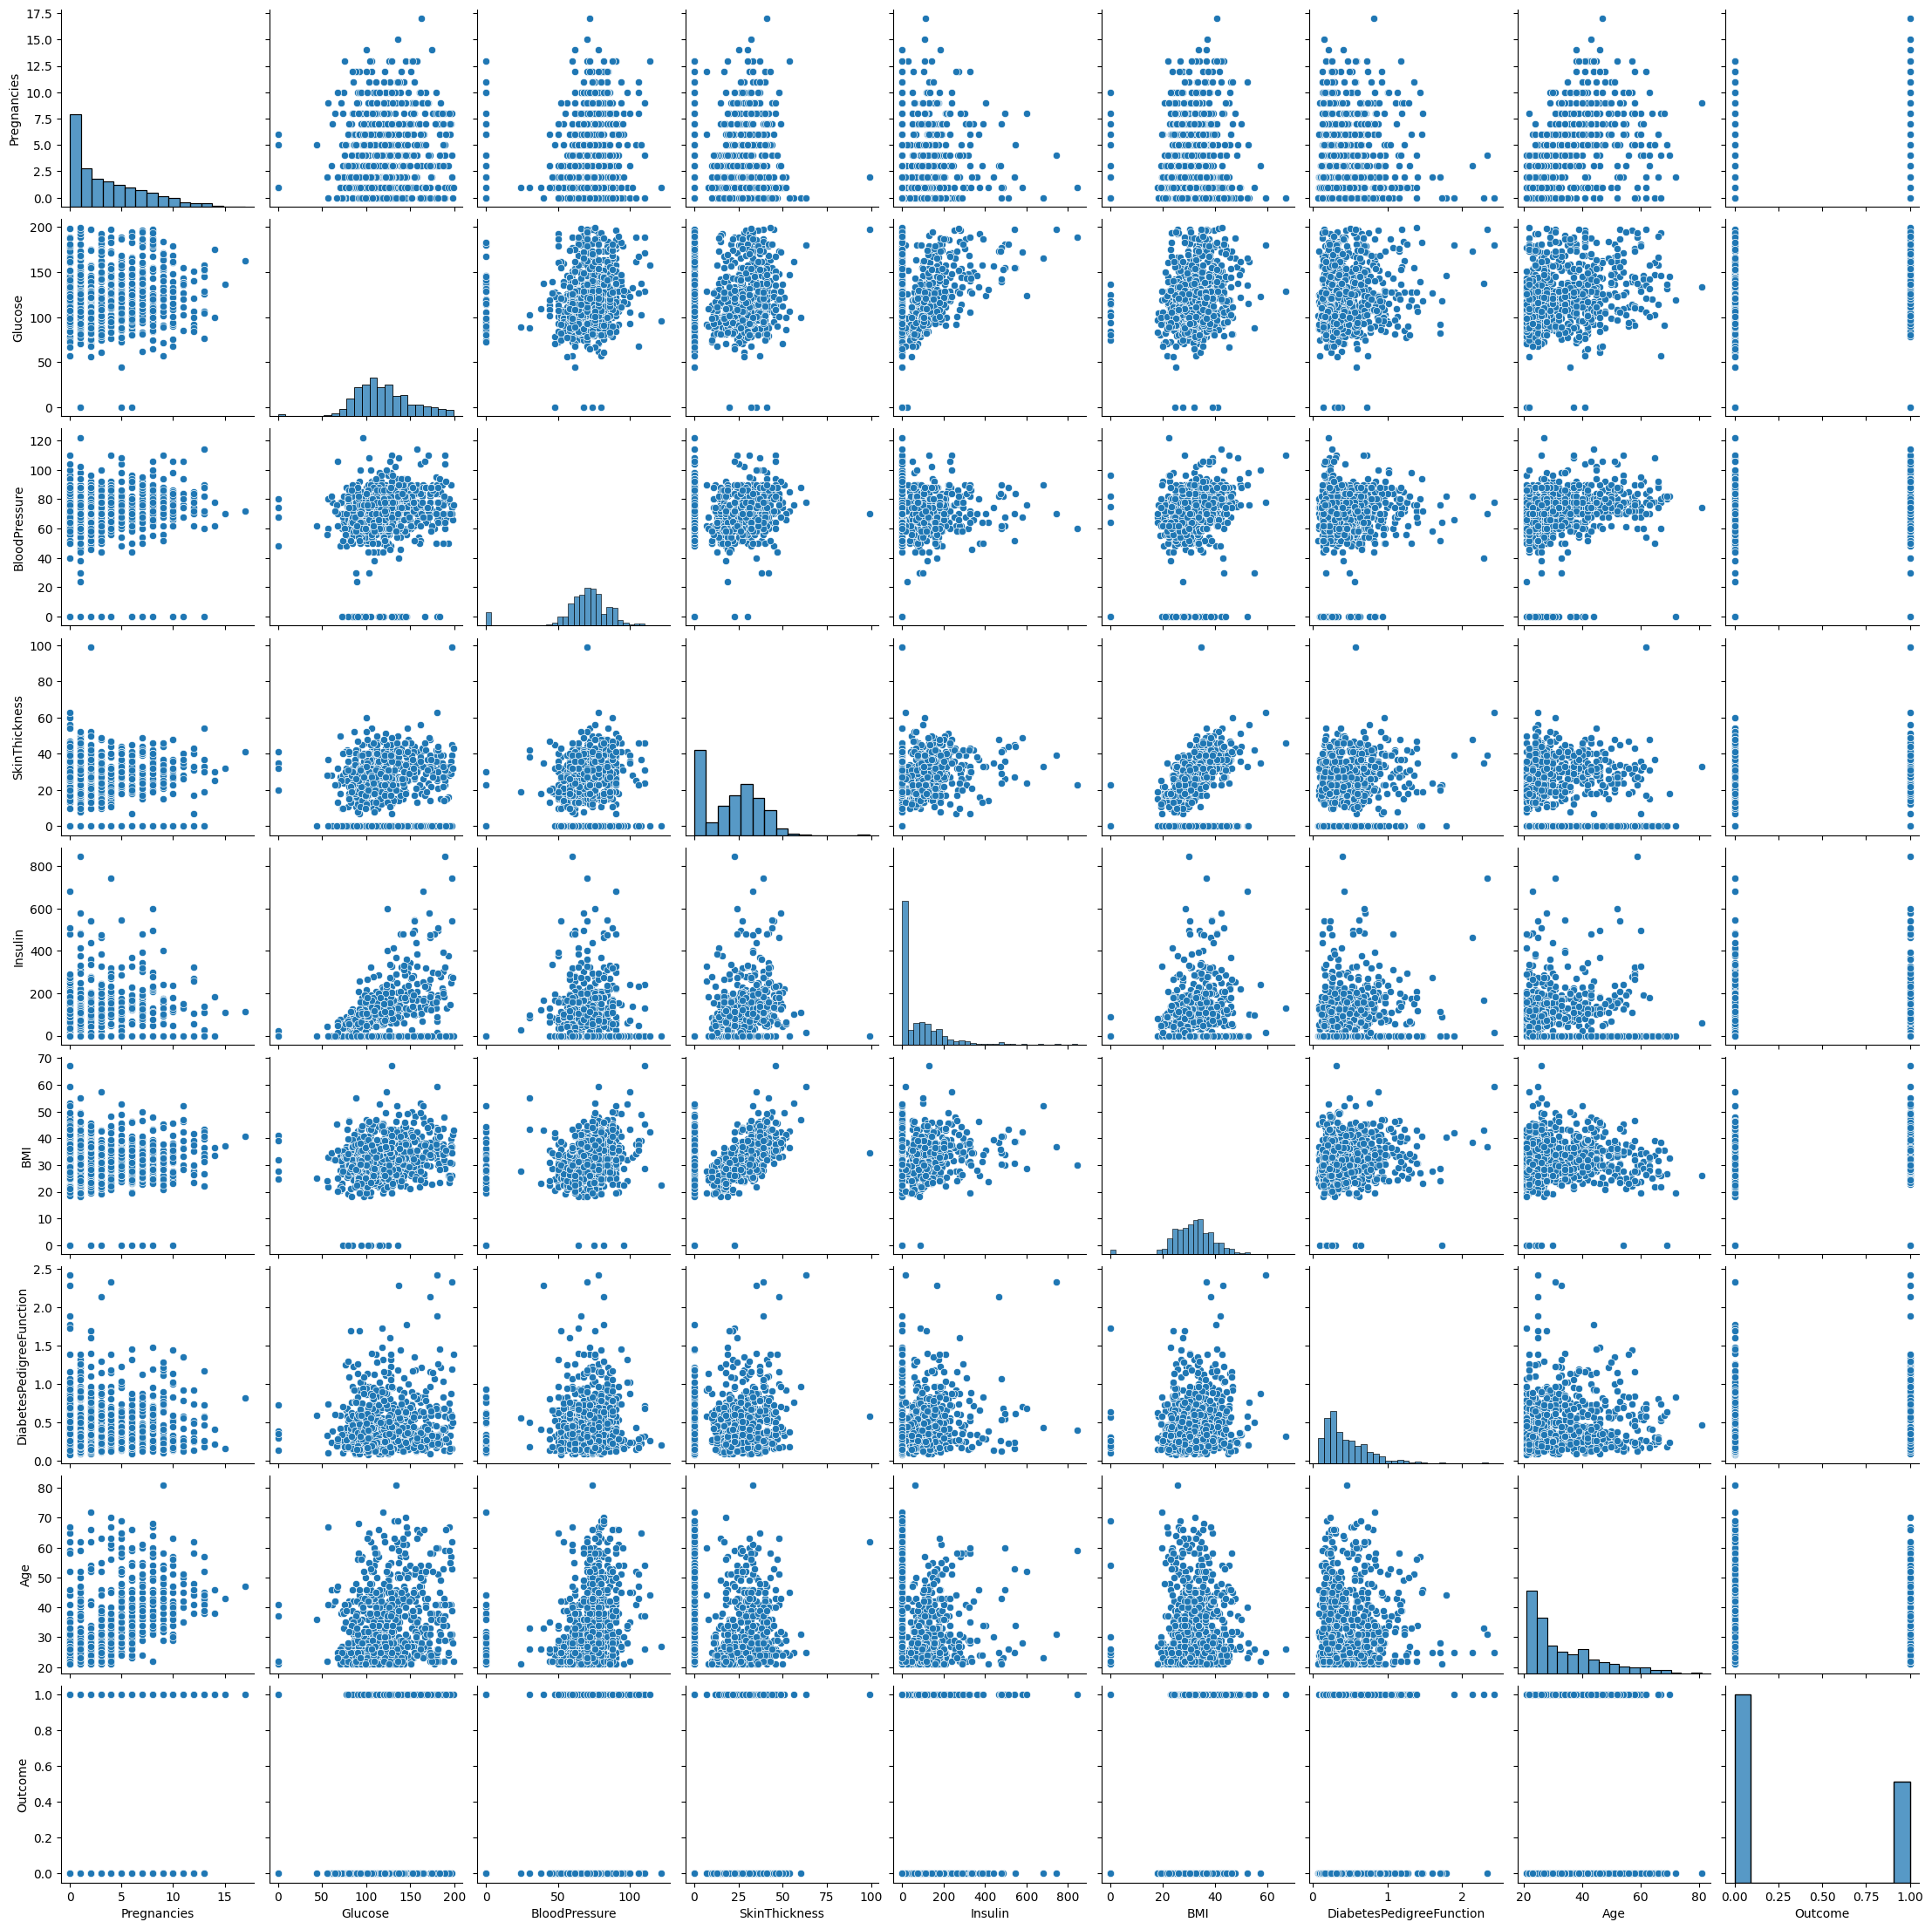

In [13]:
sns.pairplot(data)

# PASO 5: ingeniería de características.

- Analisis de Outliers
----------------------------------------------------

In [14]:
# Comprobamos las metricas de la tabla.

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
#Creamos una funcion para transformar los outliers.

def SplitOutliers(dataset, target):
    
    dataset_with_outliers = dataset.copy()
    
    #Establecemos los limites.
    for i in dataset.columns:
        if (i == target):
            print(f"Target detected: {target}")
            pass

        else:
            stats = dataset[i].describe()
            iqr = stats["75%"] - stats["25%"]
            upper_limit = float(stats["75%"] + (2 * iqr))
            lower_limit = float(stats["25%"] - (2 * iqr))
            if (lower_limit < 0):
                lower_limit = 0

            #Ajustamos el outlier por encima.
            dataset[i] = dataset[i].apply(lambda x : upper_limit if (x > upper_limit) else x)

            #Ajustamos el outlier por debajo.
            dataset[i] = dataset[i].apply(lambda x : lower_limit if (x < lower_limit) else x)

            #Guardamos los límites en un json.
            with open (f"../data/interim/outerliers_{i}.json", "w") as j:
                json.dump({"upper_limit" : upper_limit, "lower_limit" : lower_limit}, j)
    
    return dataset_with_outliers, dataset

data_with_outliers, data_without_outliers = SplitOutliers (data, target)

Target detected: Outcome


In [16]:
#Comprobamos si existen valores faltantes.

data_with_outliers.isna().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data_without_outliers.isna().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- En este caso no hay valores faltantes

- Inferencia de Nuevas características.
-------------------------------------------------------------

In [18]:
#Inferencias de nuevas características.

- En este caso no veo razones para crear nuevas características.
---------------------------------------------------------------

#### Escalado de Valores
---------------------------------------

In [19]:
# Primero dividimos los dataframes entre test y train

def SplitData(dataset, target):
    #Aislamos el target
    features = []
    for i in dataset.columns:
        if (i == target):
            pass
        else:
            features.append(i)
    
    x = dataset.drop(target, axis = 1)[features]
    y = dataset[target].squeeze()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

    return x_train, x_test, y_train, y_test

x_train_with_outliers, x_test_with_outliers, y_train, y_test = SplitData(data_with_outliers, target)
x_train_without_outliers, x_test_without_outliers, _, _ = SplitData(data_without_outliers, target)

y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")

In [20]:
#Tenemos que escalar los dataset con Normalizacion y con Escala mM (min-Max)

#Normalizacion
def StandardScaleData(dataset):
    #Aislamos el target
    features = []
    for i in dataset.columns:
        if (i == target):
            pass
        else:
            features.append(i)

    scaler = StandardScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = features)
    
    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/standar_scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/standar_scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_standarscale = StandardScaleData(x_train_with_outliers)
x_train_without_outliers_standarscale = StandardScaleData(x_train_without_outliers)
x_test_with_outliers_standscale = StandardScaleData(x_test_with_outliers)
x_test_without_outliers_standscale = StandardScaleData(x_test_without_outliers)

In [21]:
#Escala mM
def MinMaxScaleData(dataset):
    #Aislamos el target
    features = []
    for i in dataset.columns:
        if (i == target):
            pass
        else:
            features.append(i)

    scaler = MinMaxScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = features)

    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_mMScale = MinMaxScaleData(x_train_with_outliers)
x_train_without_outliers_mMScale = MinMaxScaleData(x_train_without_outliers)
x_test_with_outliers_mMScale = MinMaxScaleData(x_test_with_outliers)
x_test_without_outliers_mMScale = MinMaxScaleData(x_test_without_outliers)

# PASO 6: Selección de caracteristicas
----------------------------------------

In [49]:
#Seleccion de caracteristicas

def SelectFeaturesTrain(dataset, y, filename, k = 7):
    sel_model = SelectKBest(f_classif, k=k)
    sel_model.fit(dataset, y)
    col_name = sel_model.get_support()
    x_sel = pd.DataFrame(sel_model.transform(dataset), columns = dataset.columns.values[col_name])
    dump(sel_model, open(f"../data/interim/{filename}.sav", "wb"))
    train_cols = x_sel.columns
    return x_sel, train_cols

def SelectFeaturesTest(dataset, y, filename, train_cols, k = 7):
    dataset = pd.DataFrame(dataset[train_cols])
    sel_model = SelectKBest(f_classif, k=k)
    sel_model.fit(dataset, y)
    col_name = sel_model.get_support()
    x_sel = pd.DataFrame(sel_model.transform(dataset), columns = dataset.columns.values[col_name])
    dump(sel_model, open(f"../data/interim/{filename}.sav", "wb"))
    return x_sel

In [50]:
#Dataset sin normalizacion
x_train_sel_with_outliers, cols = SelectFeaturesTrain(x_train_with_outliers, y_train, "x_train_with_outliers")
x_test_sel_with_outliers = SelectFeaturesTest(x_test_with_outliers, y_test, "x_test_sel_with_outliers", cols)
x_train_sel_without_outliers, cols = SelectFeaturesTrain(x_train_without_outliers, y_train, "x_train_without_outliers")
x_test_sel_without_outliers = SelectFeaturesTest(x_test_with_outliers, y_test, "x_test_sel_without_outliers", cols)

#Dataset Normalizado
x_train_sel_with_outliers_standarscale, cols = SelectFeaturesTrain(x_train_with_outliers_standarscale, y_train, "x_train_with_outliers_standarscale")
x_test_sel_with_outliers_standarscale = SelectFeaturesTest(x_test_with_outliers, y_test, "x_test_sel_with_outliers_standarscale", cols)
x_train_sel_without_outliers_standarscale, cols = SelectFeaturesTrain(x_train_without_outliers_standarscale, y_train, "x_train_sel_without_outliers_standarscale")
x_test_sel_without_outliers_standarscale = SelectFeaturesTest(x_test_with_outliers, y_test, "x_test_sel_without_outliers_standarscale", cols)

#Train dataset Escalado min-Max
x_train_sel_with_outliers_mMScale, cols = SelectFeaturesTrain(x_train_with_outliers_mMScale, y_train, "x_test_with_outliers_mMScaler")
x_test_sel_with_outliers_mMScale = SelectFeaturesTest(x_test_with_outliers, y_test, "x_test_sel_with_outliers_mMScale", cols)
x_train_sel_without_outliers_mMScale, cols = SelectFeaturesTrain(x_train_without_outliers_mMScale, y_train, "x_train_without_outliers_mMScaler")
x_test_sel_without_outliers_mMScale = SelectFeaturesTest(x_test_with_outliers, y_test, "x_test_sel_without_outliers_mMScale", cols)

In [51]:
#Para acabar nos guardamos los datasets en un csv

def DataToCsv(dataset, filename):
    return dataset.to_csv(f"../data/processed/{filename}.csv")

DataToCsv(x_train_sel_with_outliers, "x_train_sel_with_outliers")
DataToCsv(x_test_sel_with_outliers, "x_test_sel_with_outliers")
DataToCsv(x_train_sel_without_outliers, "x_train_sel_without_outliers")
DataToCsv(x_test_sel_without_outliers, "x_test_sel_without_outliers")
DataToCsv(x_train_sel_with_outliers_standarscale, "x_train_sel_with_outliers_standarscale")
DataToCsv(x_test_sel_with_outliers_standarscale, "x_test_sel_with_outliers_standarscale")
DataToCsv(x_train_sel_without_outliers_standarscale, "x_train_sel_without_outliers_standarscale")
DataToCsv(x_test_sel_without_outliers_standarscale, "x_test_sel_without_outliers_standarscale")
DataToCsv(x_train_sel_with_outliers_mMScale, "x_train_sel_with_outliers_mMScale")
DataToCsv(x_test_sel_with_outliers_mMScale, "x_test_sel_with_outliers_mMScale")
DataToCsv(x_train_sel_without_outliers_mMScale, "x_train_sel_without_outliers_mMScale")
DataToCsv(x_test_sel_without_outliers_mMScale, "x_test_sel_without_outliers_mMScale")

# ESTO YA NO ES PARTE DEL EDA

# Machine Learning

In [52]:
traindfs = [ x_train_sel_with_outliers, x_train_sel_without_outliers, x_train_sel_with_outliers_standarscale, x_train_sel_without_outliers_standarscale, x_train_sel_with_outliers_mMScale, x_train_sel_without_outliers_mMScale]
testdfs = [ x_test_sel_with_outliers, x_test_sel_without_outliers, x_test_sel_with_outliers_standarscale, x_test_sel_without_outliers_standarscale, x_test_sel_with_outliers_mMScale, x_test_sel_without_outliers_mMScale]

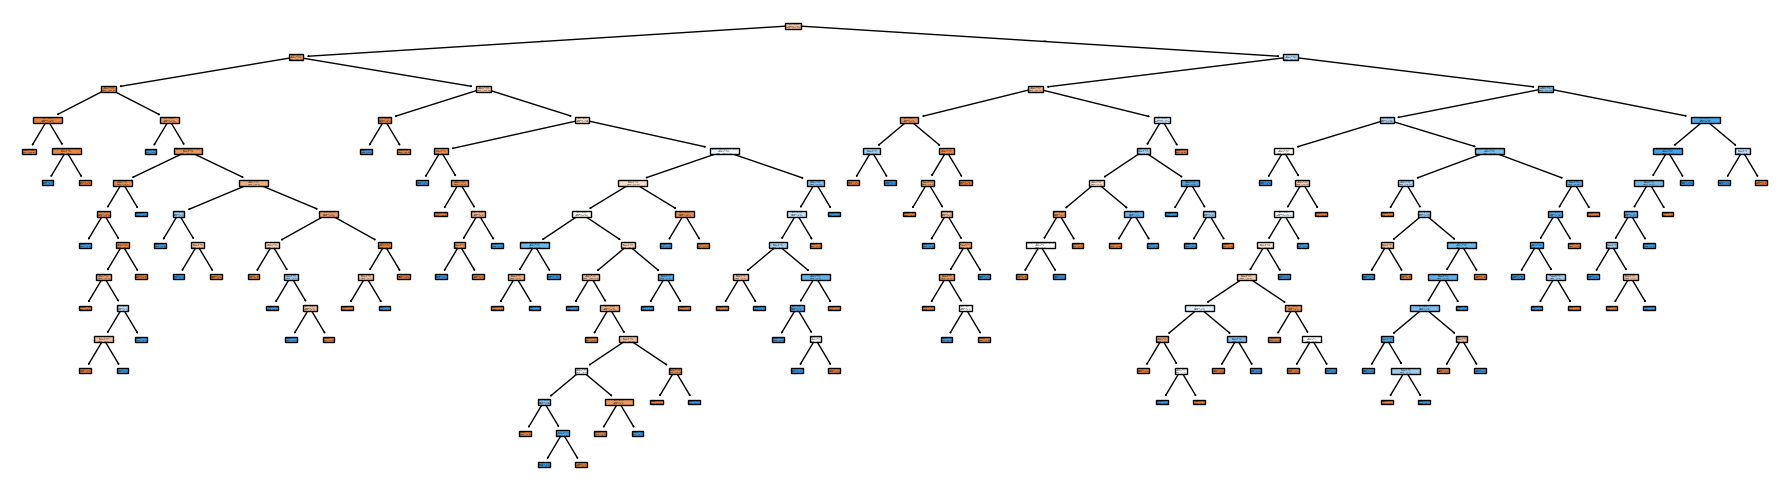

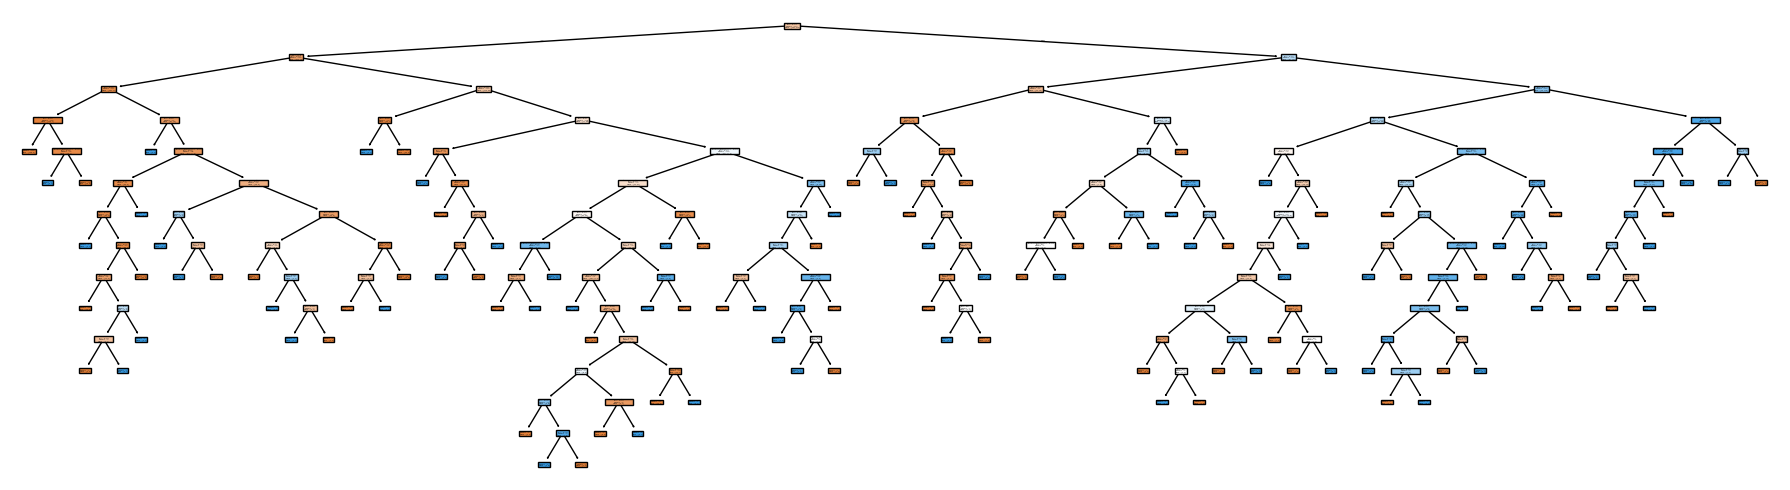

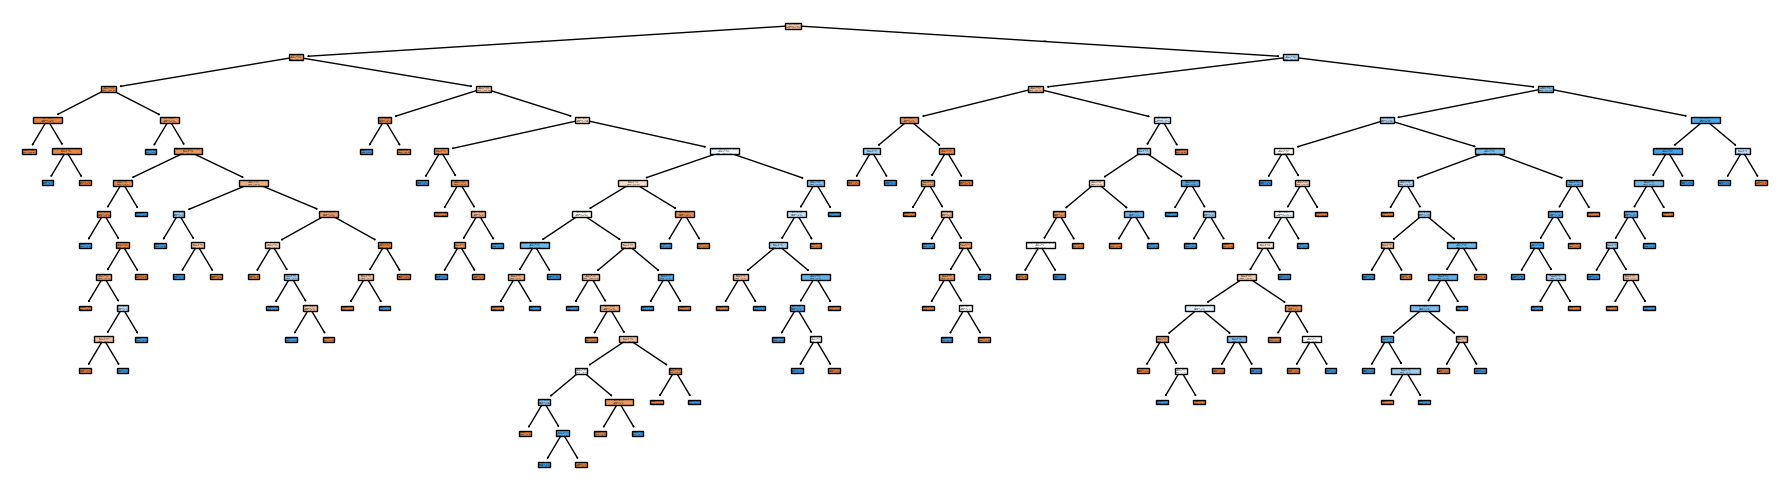

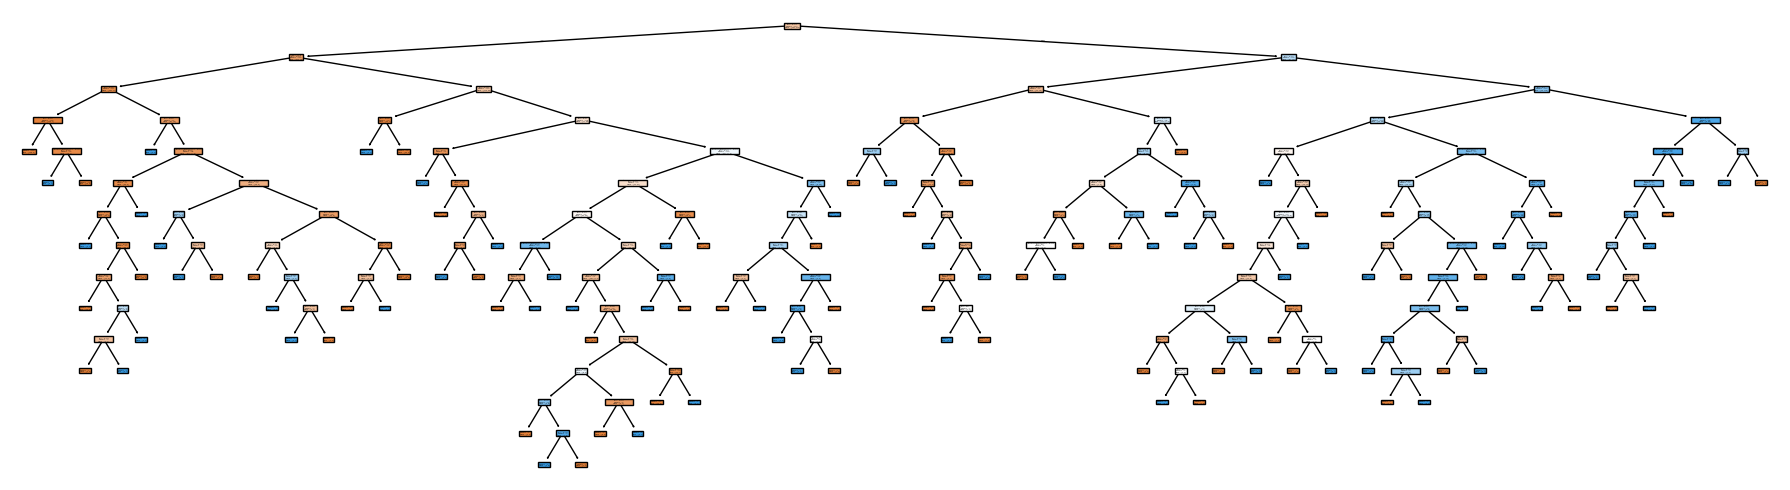

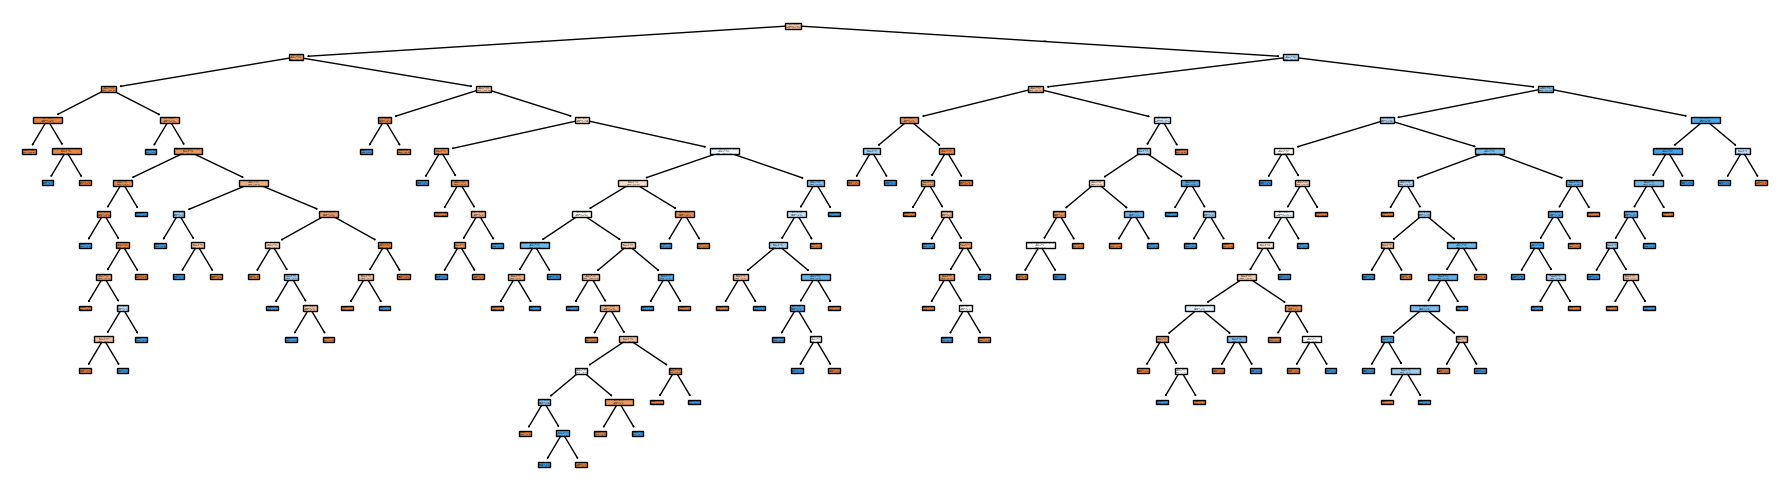

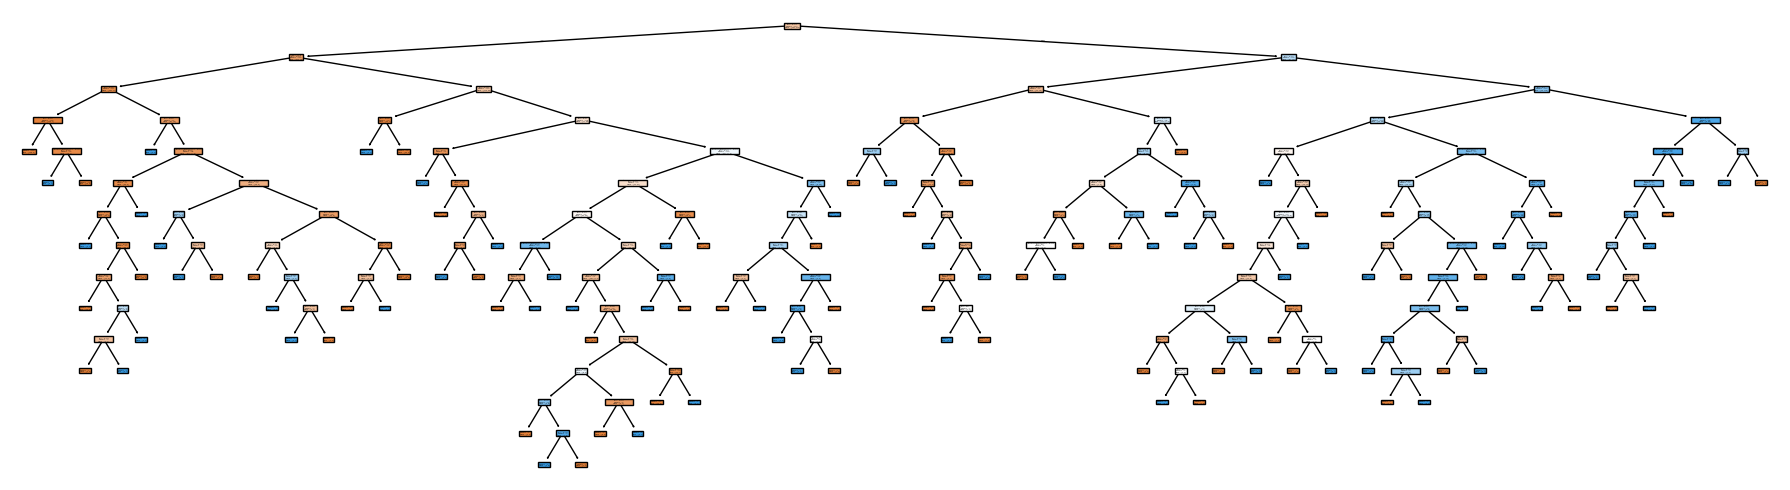

[{'index': 0, 'train_score': 1.0, 'test_score': 0.7597402597402597},
 {'index': 1, 'train_score': 1.0, 'test_score': 0.7532467532467533},
 {'index': 2, 'train_score': 1.0, 'test_score': 0.7597402597402597},
 {'index': 3, 'train_score': 1.0, 'test_score': 0.7532467532467533},
 {'index': 4, 'train_score': 1.0, 'test_score': 0.7597402597402597},
 {'index': 5, 'train_score': 1.0, 'test_score': 0.7532467532467533}]

In [53]:
def DecisionTree (traindataset, testdataset):
    results = []
    models = []

    for i in range(len(traindataset)):
        model = DecisionTreeClassifier(random_state=42)
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])

        models.append(model)
        result = {"index" : i, "train_score" : accuracy_score(y_train, y_train_predict), "test_score" : accuracy_score(y_test, y_test_predict)}
        results.append(result)

        plt.figure(figsize=(18,5))
        tree.plot_tree(model, feature_names = traindf.columns, filled = True)

        plt.tight_layout()
        plt.show()

    return sorted(results, key = lambda x : x["train_score"], reverse=True), models

pre_results, pre_models = DecisionTree(traindfs, testdfs)

with open ("../data/processed/accuracy.json", "w") as j:
        json.dump( pre_results, j)

pre_results

#### Conclusiones
--------------------------------------------

Los modelos presentan un claro overfitting.

In [54]:
#Creamos el diccionario de hyperparametros

hyperparameters = {"criterion" : ["gini", "entropy", "log_loss"], "splitter" : ["best", "random"], "max_depth" : np.random.randint(1, 5, size=5), "min_samples_split" : np.random.randint(5, size=5), "min_samples_leaf" : np.random.randint(1, 5, size=5), "random_state" : [42]}


In [55]:
#Pasamos el modelo preentrenado con los hiperparametros (En este caso paso un grid pero podría pasar un RandomSearchCV)
grid = GridSearchCV(pre_models[0], hyperparameters, scoring="accuracy")

grid.fit(x_train_sel_without_outliers_standarscale, y_train)

grid.best_params_

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
750 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

{'criterion': 'gini',
 'max_depth': np.int32(3),
 'min_samples_leaf': np.int32(3),
 'min_samples_split': np.int32(2),
 'random_state': 42,
 'splitter': 'best'}

In [59]:
#Guardamos el modelo entrenado

clf = grid.best_estimator_

y_test_predict = clf.predict(x_test_sel_with_outliers)

score = accuracy_score(y_test, y_test_predict)

score

0.7597402597402597

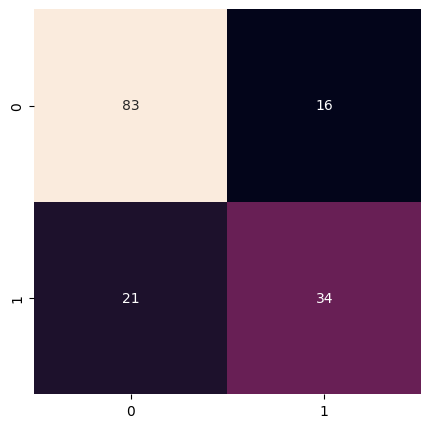

In [60]:
#Creamos la matriz de confusion para ver donde estaban los errores

confmatrx = pd.DataFrame(confusion_matrix(y_test, y_test_predict))

plt.figure(figsize=(5,5))

sns.heatmap(data = confmatrx, annot = True, fmt="d", cbar = False)

plt.show()